In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [2]:
data = []
labels = []
classes = 43
#cur_path = os.getcwd()
71#Retrieving the images and their labels 
for i in range(classes):
    path = os.path.join('traffic sign','Train',str(i))
    imgfol = os.listdir(path)
    for a in imgfol:
        try:
            img = Image.open(path + '\\'+ a)
            img = img.resize((30,30))
            #if i==0:
            #cv2.imshow("1",img)
            img = np.array(img)
            #sim = Image.fromarray(image)
            data.append(img)
            labels.append(i)
        except:
            print("Error loading image")
#Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)
print(data.shape, labels.shape)
doup_data,a_data,doup_labels,a_labels = train_test_split(data,labels,test_size=0.2,random_state=50)
b_data,c_data,b_labels,c_labels = train_test_split(doup_data,doup_labels,test_size=0.6,random_state=51)

a_labels=to_categorical(a_labels,43)
b_labels=to_categorical(b_labels,43)
c_labels=to_categorical(c_labels,43)

print(a_data.shape, a_labels.shape)
print(b_data.shape, b_labels.shape)
print(c_data.shape, c_labels.shape)

(39209, 30, 30, 3) (39209,)
(7842, 30, 30, 3) (7842, 43)
(12546, 30, 30, 3) (12546, 43)
(18821, 30, 30, 3) (18821, 43)


In [22]:
a_data.shape[0]

7842

In [3]:
####
#X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.0001, random_state=42)
#print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
#print(y_train)
#Converting the labels into one hot encoding
#y_train = to_categorical(y_train, 43)
#y_test = to_categorical(y_test, 43)
#print(y_train)


In [3]:
model_1 = Sequential()
model_1.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=a_data.shape[1:],kernel_initializer=tf.keras.initializers.GlorotNormal(seed=2),bias_initializer=tf.keras.initializers.zeros()))
model_1.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model_1.add(MaxPool2D(pool_size=(2, 2)))
model_1.add(Dropout(rate=0.25))
model_1.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model_1.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model_1.add(MaxPool2D(pool_size=(2, 2)))
model_1.add(Dropout(rate=0.25))
model_1.add(Flatten())
model_1.add(Dense(256, activation='relu'))
model_1.add(Dropout(rate=0.5))
model_1.add(Dense(43, activation='softmax'))
#Compilation of the model
model_1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [4]:
model_2 = Sequential()
model_2.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=a_data.shape[1:],kernel_initializer=tf.keras.initializers.GlorotNormal(seed=2),bias_initializer=tf.keras.initializers.zeros()))
model_2.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model_2.add(MaxPool2D(pool_size=(2, 2)))
model_2.add(Dropout(rate=0.25))
model_2.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model_2.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model_2.add(MaxPool2D(pool_size=(2, 2)))
model_2.add(Dropout(rate=0.25))
model_2.add(Flatten())
model_2.add(Dense(256, activation='relu'))
model_2.add(Dropout(rate=0.5))
model_2.add(Dense(43, activation='softmax'))
#Compilation of the model
model_2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [5]:
model_3 = Sequential()
model_3.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=a_data.shape[1:],kernel_initializer=tf.keras.initializers.GlorotNormal(seed=2),bias_initializer=tf.keras.initializers.zeros()))
model_3.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model_3.add(MaxPool2D(pool_size=(2, 2)))
model_3.add(Dropout(rate=0.25))
model_3.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model_3.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model_3.add(MaxPool2D(pool_size=(2, 2)))
model_3.add(Dropout(rate=0.25))
model_3.add(Flatten())
model_3.add(Dense(256, activation='relu'))
model_3.add(Dropout(rate=0.5))
model_3.add(Dense(43, activation='softmax'))
#Compilation of the model
model_3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [6]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=a_data.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:
epochs = 7
history_a = model_1.fit(a_data, a_labels, batch_size=64, epochs=epochs)

Epoch 1/7
123/123 [==============================] - 19s 153ms/step - loss: 3.9425 - accuracy: 0.1344
Epoch 2/7
123/123 [==============================] - 19s 152ms/step - loss: 2.2700 - accuracy: 0.4169
Epoch 3/7
123/123 [==============================] - 19s 154ms/step - loss: 1.4397 - accuracy: 0.6033
Epoch 4/7
123/123 [==============================] - 19s 154ms/step - loss: 1.0104 - accuracy: 0.7164
Epoch 5/7
123/123 [==============================] - 18s 149ms/step - loss: 0.7341 - accuracy: 0.7911
Epoch 6/7
123/123 [==============================] - 18s 146ms/step - loss: 0.5779 - accuracy: 0.8347
Epoch 7/7
123/123 [==============================] - 18s 148ms/step - loss: 0.5068 - accuracy: 0.8540


In [8]:
epochs = 7
history_b = model_2.fit(b_data, b_labels, batch_size=64, epochs=epochs)

Epoch 1/7
197/197 [==============================] - 29s 147ms/step - loss: 3.3522 - accuracy: 0.2457
Epoch 2/7
197/197 [==============================] - 29s 147ms/step - loss: 1.4269 - accuracy: 0.6104
Epoch 3/7
197/197 [==============================] - 32s 165ms/step - loss: 0.8747 - accuracy: 0.7469
Epoch 4/7
197/197 [==============================] - 35s 177ms/step - loss: 0.6602 - accuracy: 0.8057
Epoch 5/7
197/197 [==============================] - 34s 175ms/step - loss: 0.5586 - accuracy: 0.8344
Epoch 6/7
197/197 [==============================] - 36s 184ms/step - loss: 0.4270 - accuracy: 0.8719
Epoch 7/7
197/197 [==============================] - 31s 157ms/step - loss: 0.3297 - accuracy: 0.9019s - loss: 0.3303 - accuracy: 


In [9]:
epochs = 7
history_c = model_3.fit(c_data, c_labels, batch_size=64, epochs=epochs)

Epoch 1/7
295/295 [==============================] - 47s 161ms/step - loss: 2.7370 - accuracy: 0.3442
Epoch 2/7
295/295 [==============================] - 50s 171ms/step - loss: 1.0476 - accuracy: 0.7011
Epoch 3/7
295/295 [==============================] - 53s 178ms/step - loss: 0.5968 - accuracy: 0.8258
Epoch 4/7
295/295 [==============================] - 43s 147ms/step - loss: 0.4294 - accuracy: 0.8741
Epoch 5/7
295/295 [==============================] - 45s 153ms/step - loss: 0.3464 - accuracy: 0.9008
Epoch 6/7
295/295 [==============================] - 44s 149ms/step - loss: 0.2700 - accuracy: 0.9222
Epoch 7/7
295/295 [==============================] - 44s 150ms/step - loss: 0.2580 - accuracy: 0.9268


In [10]:
#plotting graphs for accuracy 
def plotting(history):
    plt.figure(0)
    plt.plot(history.history['accuracy'], label='training accuracy')
    #plt.plot(history_a.history_a['val_accuracy'], label='val accuracy')
    plt.title('Accuracy')
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.legend()
    plt.show()
    plt.figure(1)
    plt.plot(history.history['loss'], label='training loss')
    #plt.plot(history_a.history_a['val_loss'], label='val loss')
    plt.title('Loss')
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.legend()
    plt.show()

In [11]:
from sklearn.metrics import accuracy_score
y_test = pd.read_csv(os.path.join('traffic sign','Test.csv'),delimiter=',')

labels = y_test["ClassId"].values
imgs = y_test["Path"].values
data=[]
for img in imgs:
    image = Image.open('traffic sign'+'/'+img)
    image = image.resize((30,30))
    data.append(np.array(image))
X_test=np.array(data)

pred = model.predict_classes(X_test)
#Accuracy with the test data
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, pred))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
0.011163895486935867


In [12]:
weights_1=np.array(model_1.get_weights())
weights_2=np.array(model_2.get_weights())
weights_3=np.array(model_3.get_weights())
avg_weights=[]

In [13]:
for w1,w2,w3 in zip(weights_1,weights_2,weights_3):
    avg_weights.append((w1+w2+w3)/3)
    

In [14]:
model.set_weights(avg_weights)

In [17]:
avg_weights

[array([[[[-0.03602339, -0.01844678, -0.05708029, ..., -0.05328565,
            0.06996036,  0.03687194],
          [-0.0435061 ,  0.02564891,  0.04863511, ...,  0.0373552 ,
           -0.05756892, -0.02944934],
          [-0.04293151,  0.03552453, -0.00775495, ...,  0.02473168,
            0.04134956,  0.08141745]],
 
         [[ 0.05528162, -0.08365121,  0.03316536, ..., -0.04893985,
            0.01349887, -0.01880951],
          [-0.03150431,  0.04810603, -0.02572898, ..., -0.01353488,
           -0.06206114, -0.03173355],
          [ 0.03390643,  0.05073258,  0.0265094 , ...,  0.01486843,
           -0.0453724 , -0.11634046]],
 
         [[-0.00740939,  0.06935046,  0.05274661, ...,  0.00122365,
           -0.06107742, -0.00018763],
          [-0.07164088,  0.01661586, -0.08246578, ..., -0.00958275,
           -0.02517111,  0.06172861],
          [ 0.07728896, -0.03472558, -0.0466532 , ...,  0.01296377,
           -0.01228036, -0.00092997]],
 
         [[-0.01481687, -0.0013531 , 

In [15]:
weights_1[0][0][0][0][0]

-0.02801021

In [16]:
weights_2[0][0][0][0][0]

-0.029610591

In [17]:
weights_3[0][0][0][0][0]

-0.045189984

In [18]:
avg_weights[0][0][0][0][0]

-0.03427026

In [19]:
from sklearn.metrics import accuracy_score
def validation_scores(model_val):
    y_test = pd.read_csv(os.path.join('traffic sign','Test.csv'),delimiter=',')

    labels = y_test["ClassId"].values
    imgs = y_test["Path"].values
    data=[]
    for img in imgs:
        image = Image.open('traffic sign'+'/'+img)
        image = image.resize((30,30))
        data.append(np.array(image))
    X_test=np.array(data)

    pred = model_val.predict_classes(X_test)
    #Accuracy with the test data
    from sklearn.metrics import accuracy_score
    print(accuracy_score(labels, pred)) 

Epoch 1/5
123/123 [==============================] - 19s 155ms/step - loss: 1.9406 - accuracy: 0.4762
Epoch 2/5
123/123 [==============================] - 18s 147ms/step - loss: 0.7254 - accuracy: 0.7957
Epoch 3/5
123/123 [==============================] - 19s 151ms/step - loss: 0.4634 - accuracy: 0.8746
Epoch 4/5
123/123 [==============================] - 19s 153ms/step - loss: 0.3556 - accuracy: 0.8989
Epoch 5/5
123/123 [==============================] - 22s 182ms/step - loss: 0.3120 - accuracy: 0.9158
Epoch 1/5
197/197 [==============================] - 44s 224ms/step - loss: 1.6234 - accuracy: 0.5589
Epoch 2/5
197/197 [==============================] - 32s 164ms/step - loss: 0.4934 - accuracy: 0.8600
Epoch 3/5
197/197 [==============================] - 31s 159ms/step - loss: 0.3306 - accuracy: 0.9086
Epoch 4/5
197/197 [==============================] - 30s 154ms/step - loss: 0.2600 - accuracy: 0.9275
Epoch 5/5
197/197 [==============================] - 32s 164ms/step - loss: 0.2564

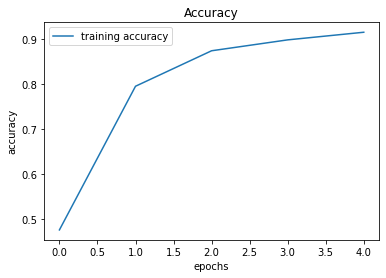

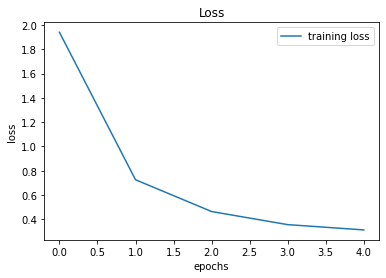

for i=0b


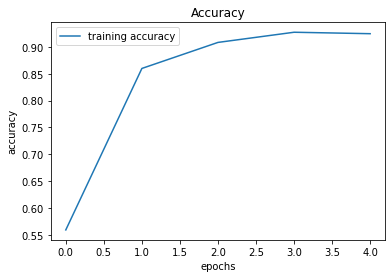

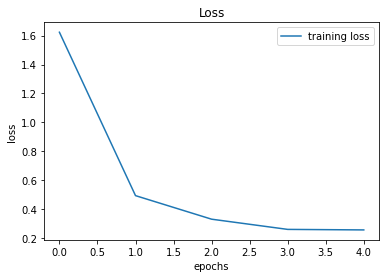

for i=0c


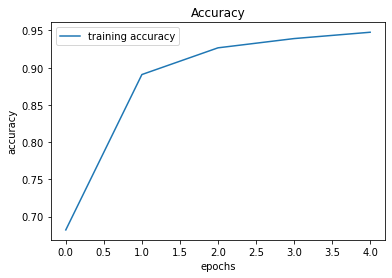

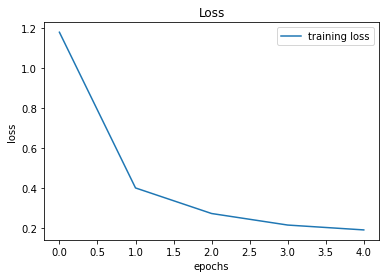

0.93784639746635
0.9495645288994458
0.9539192399049882
Epoch 1/5
123/123 [==============================] - 20s 160ms/step - loss: 0.2981 - accuracy: 0.9225
Epoch 2/5
123/123 [==============================] - 21s 170ms/step - loss: 0.2101 - accuracy: 0.9411
Epoch 3/5
123/123 [==============================] - 20s 162ms/step - loss: 0.1576 - accuracy: 0.9568
Epoch 4/5
123/123 [==============================] - 19s 156ms/step - loss: 0.1539 - accuracy: 0.9593
Epoch 5/5
123/123 [==============================] - 19s 152ms/step - loss: 0.1418 - accuracy: 0.9597
Epoch 1/5
197/197 [==============================] - 30s 153ms/step - loss: 0.2746 - accuracy: 0.9269
Epoch 2/5
197/197 [==============================] - 30s 153ms/step - loss: 0.1834 - accuracy: 0.9483
Epoch 3/5
197/197 [==============================] - 31s 157ms/step - loss: 0.1505 - accuracy: 0.9591
Epoch 4/5
197/197 [==============================] - 39s 199ms/step - loss: 0.2464 - accuracy: 0.9344
Epoch 5/5
197/197 [========

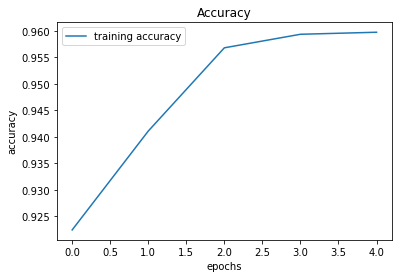

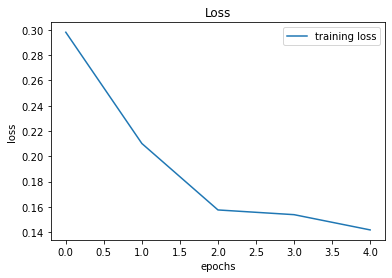

for i=1b


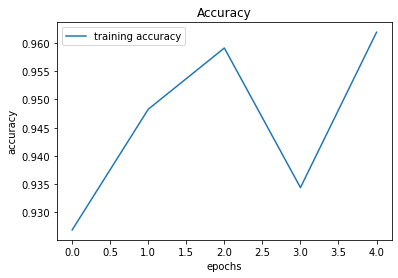

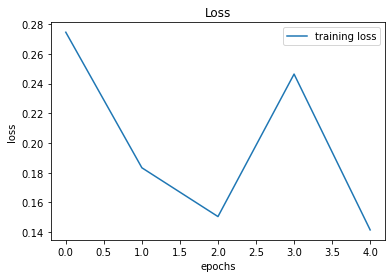

for i=1c


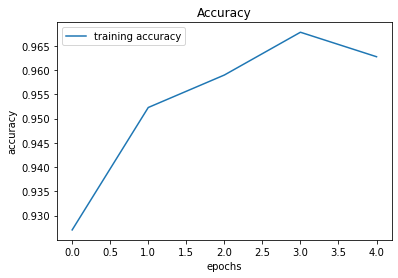

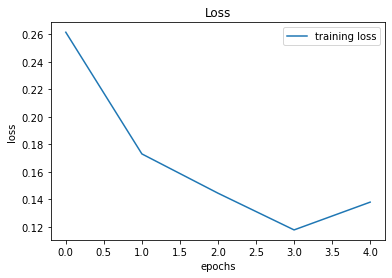

0.9613618368962787
0.9612826603325416
0.960965954077593
Epoch 1/5
123/123 [==============================] - 23s 185ms/step - loss: 0.1082 - accuracy: 0.9726
Epoch 2/5
123/123 [==============================] - 22s 182ms/step - loss: 0.0987 - accuracy: 0.9733
Epoch 3/5
123/123 [==============================] - 24s 193ms/step - loss: 0.0698 - accuracy: 0.9790
Epoch 4/5
123/123 [==============================] - 22s 183ms/step - loss: 0.0605 - accuracy: 0.9821
Epoch 5/5
123/123 [==============================] - 23s 184ms/step - loss: 0.0771 - accuracy: 0.9782
Epoch 1/5
197/197 [==============================] - 36s 181ms/step - loss: 0.0908 - accuracy: 0.9746
Epoch 2/5
197/197 [==============================] - 34s 175ms/step - loss: 0.0780 - accuracy: 0.9786
Epoch 3/5
197/197 [==============================] - 35s 176ms/step - loss: 0.0964 - accuracy: 0.9714
Epoch 4/5
197/197 [==============================] - 37s 188ms/step - loss: 0.0906 - accuracy: 0.9726
Epoch 5/5
197/197 [=======

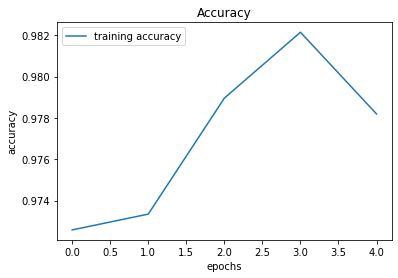

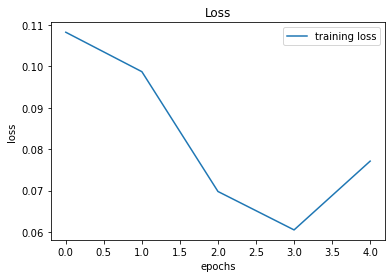

for i=2b


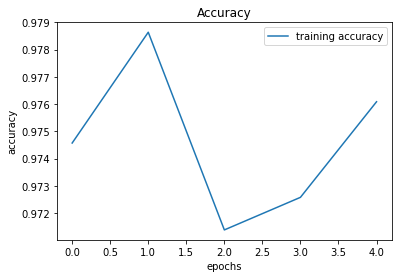

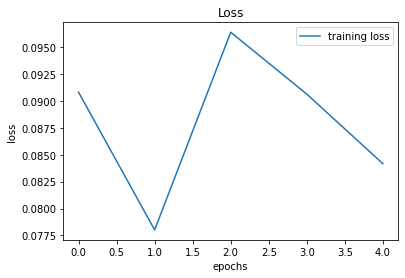

for i=2c


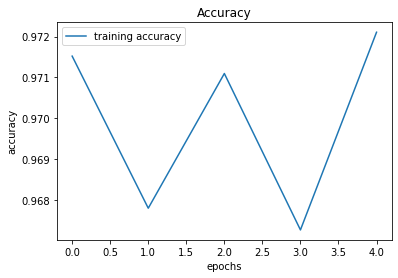

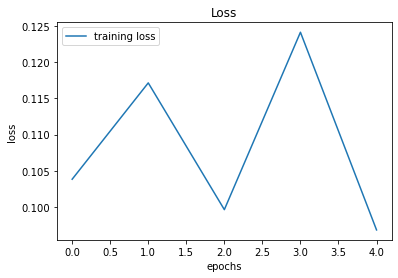

0.9649247822644498
0.9608867775138559
0.9699920823436263


In [20]:
for i in range(3):
    model_1.set_weights(avg_weights)
    model_2.set_weights(avg_weights)
    model_3.set_weights(avg_weights)
    epochs = 5
    history_a = model_1.fit(a_data, a_labels, batch_size=64, epochs=epochs)
    history_b = model_2.fit(b_data, b_labels, batch_size=64, epochs=epochs)
    history_c = model_3.fit(c_data, c_labels, batch_size=64, epochs=epochs)
    if i==0:
        print('for i=0a')
        plotting(history_a)
        print('for i=0b')
        plotting(history_b)
        print('for i=0c')
        plotting(history_c)
    if i==1:
        print('for i=1a')
        plotting(history_a)
        print('for i=1b')
        plotting(history_b)
        print('for i=1c')
        plotting(history_c)
    if i==2:
        print('for i=2a')
        plotting(history_a)
        print('for i=2b')
        plotting(history_b)
        print('for i=2c')
        plotting(history_c)
        
    validation_scores(model_1)
    validation_scores(model_2)
    validation_scores(model_3)
    weights_1=np.array(model_1.get_weights())
    weights_2=np.array(model_2.get_weights())
    weights_3=np.array(model_3.get_weights())
    avg_weights=[]
    for w1,w2,w3 in zip(weights_1,weights_2,weights_3):
        avg_weights.append((w1+w2+w3)/3)
    

In [21]:
model.set_weights(avg_weights)
validation_scores(model)

0.9728424386381631
